In [2]:
import pandas as pd

sales = pd.read_csv('sales_data.csv')
sales

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
YearSales = sales.drop(['Date', 'Day', 'Month', 'Customer_Age', 'Profit', 'Customer_Gender', 'Age_Group', 'Order_Quantity', 'Cost', 'Unit_Price', 'Unit_Cost', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product'], axis=1)
YearSales

,Year,Revenue
0,2013,950
1,2015,950
2,2014,2401
3,2016,2088
4,2014,418
...,...,...
113031,2016,184
113032,2014,1183
113033,2016,1183
113034,2014,1260


In [4]:
YearSales.keys()

Index(['Year', 'Revenue'], dtype='object')

In [5]:
type(YearSales)

pandas.core.frame.DataFrame

In [6]:
U = YearSales.Year.unique()
U

array([2013, 2015, 2014, 2016, 2012, 2011], dtype=int64)

In [7]:
a = YearSales[YearSales.Year == 2013].sum()
a
# testing the df fetch

Year       49203759
Revenue    15240037
dtype: int64

In [8]:
w, h = 0, 0
Y = [[0 for a in range(w)] for b in range(h)] 

In [10]:
for i in U:
    x = YearSales[YearSales.Year == i]
    Y.append([i, x['Revenue'].sum()])
Y

[[2013, 15240037],
 [2015, 20023991],
 [2014, 14152724],
 [2016, 17713385],
 [2012, 9175983],
 [2011, 8964888]]

In [11]:
for i in U:
    print(i, len(YearSales[YearSales.Year == i]))

2013 24443
2015 24443
2014 29398
2016 29398
2012 2677
2011 2677


<Axes: title={'center': 'Sales per Year'}, ylabel='Total Revenue'>

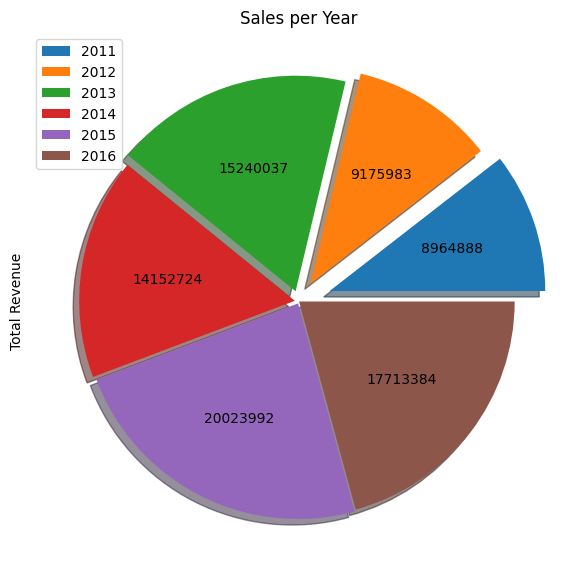

In [12]:
YearSales0 = pd.DataFrame(Y, columns = list('xy')).sort_values('x',ascending=True).rename(columns={'x':'Year','y':'Total Revenue'})
YearSales0.plot.pie(y='Total Revenue', labels = ['2011','2012','2013','2014','2015','2016'], title="Sales per Year", legend=True, autopct=lambda x : '{:.0f}'.format(x*YearSales0['Total Revenue'].sort_values().sum()/100), explode=(0.15, 0.10, 0.05, 0.02, 0.01, 0), shadow=True, startangle=0, labeldistance = None, figsize=(7,7))